In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter


In [4]:
df = pd.read_csv('proyectos_ejecucion_20230706.csv', delimiter = ',' , quotechar='"' , encoding='utf-8')
df                                 

,FONDO,CONCURSO,ANIO,CONTRATO,TITULO,FECHA_INICIO,FECHA_FIN,NOMBRE_SOLICITANTE,DISTRITO,PROVINCIA,DEPARTAMENTO,UBIGEO,MONTO_RNR,MONTO_FINANCIERO,MONTO_NO_FINANCIERO,MONEDA,FECHA_CORTE
0,FIDECOM,PIPEI,2014,263-FINCYT-FIDECOM-PIPEI-2014,SISTEMA PILOTO DE ENSAMBLE AUTOMATICO Y SOLDAD...,20141111.0,20171110.0,INDUSTRIAS JELCO E.I.R.L.,LIMA,LIMA,LIMA,150101.0,269715.27,34684.73,39000.0,SOLES,20230706
1,FIDECOM,PIMEN,2015,390-FIDECOM-PNICP-PIMEN-2015,SERVICIO DE COMUNICACIÓN Y PARTICIPACIÓN VECIN...,20151026.0,20180425.0,W & M SECURITY S.A.C.,SAN MARTIN DE PORRES,LIMA,LIMA,150135.0,130022.04,13987.96,21725.0,SOLES,20230706
2,FIDECOM,PIMEN,2015,405-FIDECOM-PNICP-PIMEN-2015,ESTANDARIZACION DE UNA TÉCNICA DE CONSERVACIÓN...,20151007.0,20181006.0,ALPAQUEL PERU SOCIEDAD ANONIMA CERRADA - ALPAQ...,MIRAFLORES,LIMA,LIMA,150122.0,149955.94,21264.06,18000.0,SOLES,20230706
3,FIDECOM,PIMEN,2015,539-FIDECOM-INNOVATEPERU-PIMEN-2015,DISEÑO Y DESARROLLO DE UN SISTEMA MECÁNICO DE ...,20160202.0,20181001.0,CURTIEMBRE SANTA ROSA SAC,LA ESPERANZA,TRUJILLO,LA LIBERTAD,130105.0,149854.67,27928.33,36720.0,SOLES,20230706
4,FIDECOM,PIMEN,2015,540-FIDECOM-INNOVATEPERU-PIMEN-2015,OBTENCIÓN DE PRODUCTOS CÁRNICOS (HAMBURGUESA Y...,20160107.0,20181206.0,ALPAQUEL PERU SOCIEDAD ANONIMA CERRADA - ALPAQ...,MIRAFLORES,LIMA,LIMA,150122.0,149350.84,20789.16,30400.0,SOLES,20230706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,BID 4,EMPRENDIMIENTOS DINAMICOS,2023,480-PROINNOVATE-EDI-2023,"OIL CONTROL, ABSORBENTE ORGÁNICO DE HIDROCARBUROS",20230620.0,20240420.0,MINERQUIM PERU S.A.C.,CHORRILLOS,LIMA,LIMA,150108.0,138833.22,23417.98,40000.0,SOLES,20230706
1460,BID 4,EMPRENDIMIENTOS DINAMICOS,2023,481-PROINNOVATE-EDI-2023,NEGOSY: SOFTWARE DE GESTIÓN EN LA NUBE PARA PY...,20230620.0,20240420.0,NEGOSY S.A.C.,TARAPOTO,SAN MARTIN,SAN MARTIN,220901.0,150000.00,21564.41,42840.0,SOLES,20230706
1461,BID 4,PROGRAMA DE INNOVACIÓN MODERNIZACIÓN TECNOLÓGI...,2023,482-PROINNOVATE-IMTEMC-2023,IMPLEMENTACIÓN Y CERTIFICACIÓN DEL SISTEMA DE ...,20230616.0,20240616.0,CENTRO DE ACTUALIZACION PROFESIONAL & CONSULTO...,CHIMBOTE,SANTA,ANCASH,21801.0,45000.00,10286.00,6857.0,SOLES,20230706
1462,BID 4,PROGRAMA DE INNOVACIÓN MODERNIZACIÓN TECNOLÓGI...,2023,491-PROINNOVATE-IMTEMC-2023,IMPLEMENTACIÓN Y CERTIFICACIÓN DE UN SISTEMA D...,20230615.0,20240715.0,A & F DESTINY E.I.R.L.,SANTIAGO,CUSCO,CUSCO,80106.0,44995.00,10290.00,6857.0,SOLES,20230706


Número total de proyectos por departamento:

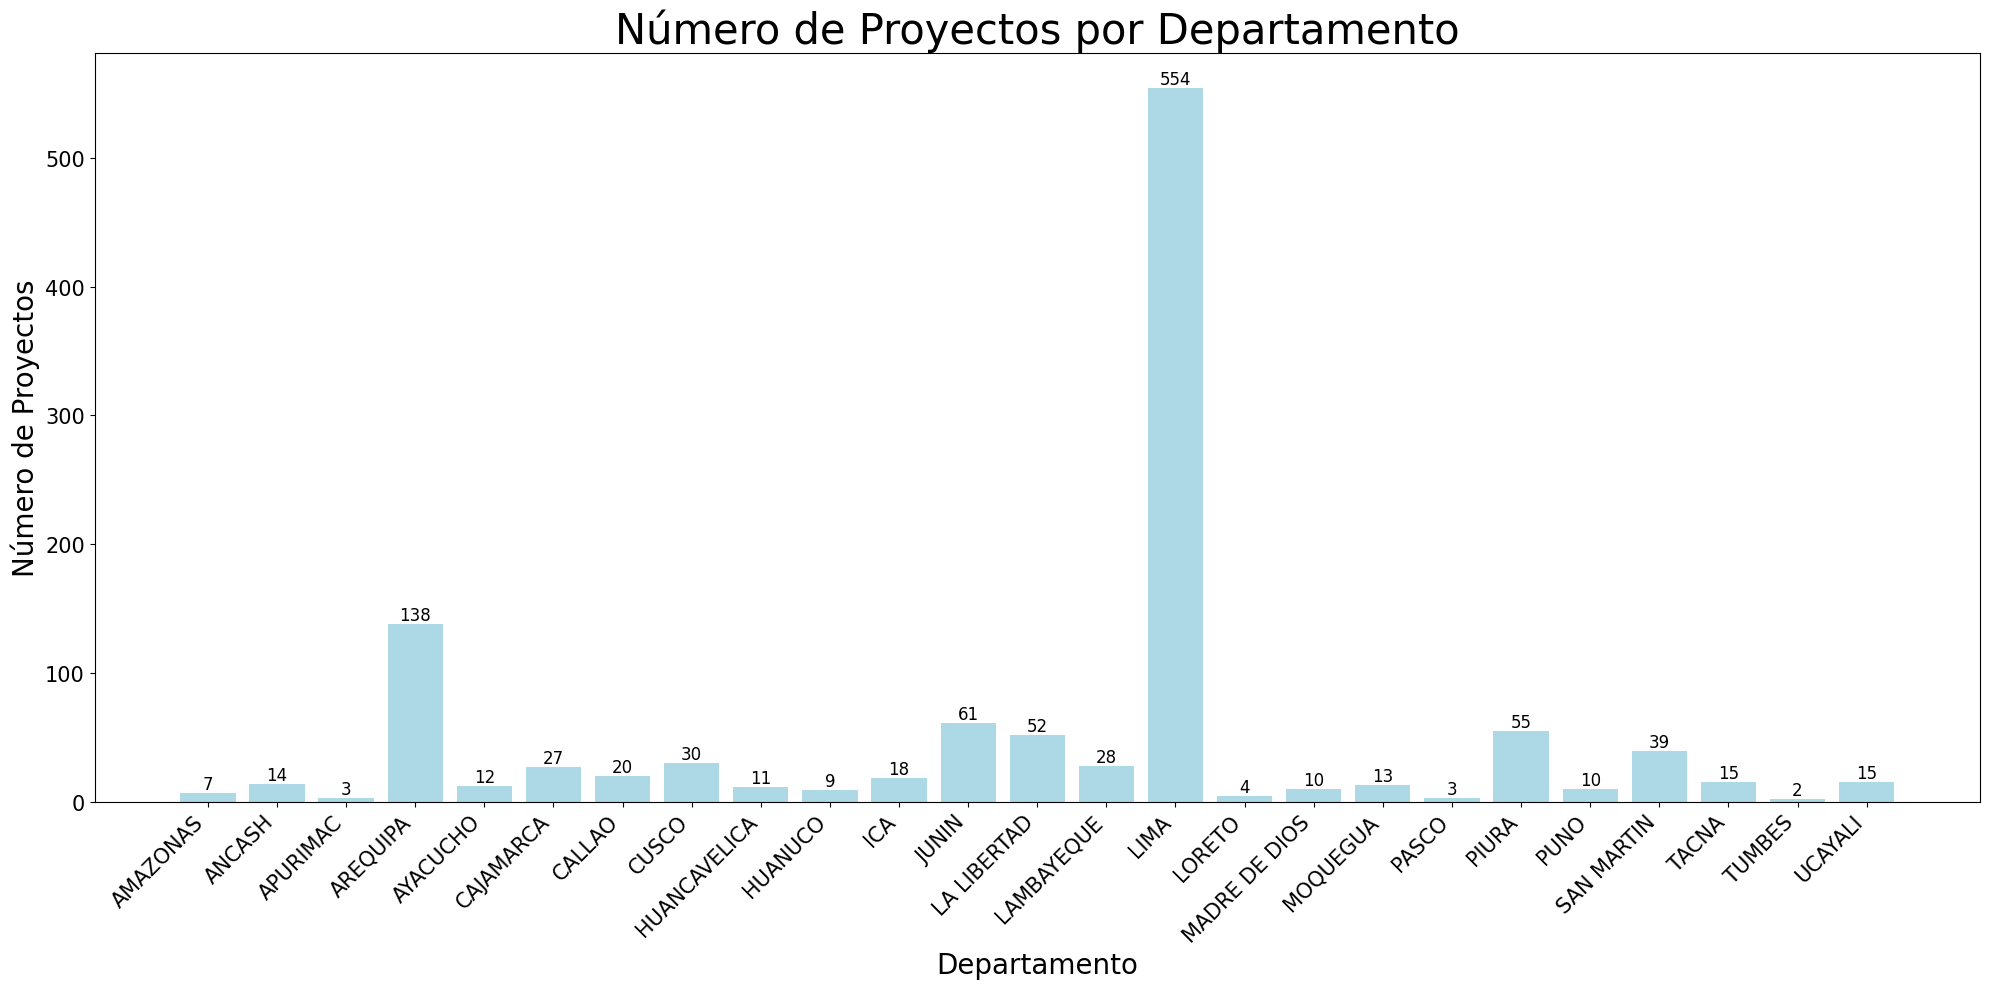

In [5]:
# Contar proyectos por departamento
proyectos_por_departamento = df.groupby('DEPARTAMENTO')['CONTRATO'].count().reset_index()
proyectos_por_departamento.columns = ['Departamento', 'Número de Proyectos']

# Crear el gráfico con un título más grande
plt.figure(figsize=(20, 10))

# Crear las barras
bars = plt.bar(proyectos_por_departamento['Departamento'], proyectos_por_departamento['Número de Proyectos'])

# Añadir los valores encima de las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom', fontsize='12')

plt.bar(proyectos_por_departamento['Departamento'], proyectos_por_departamento['Número de Proyectos'], color='lightblue')
plt.xlabel('Departamento', fontsize = 20)
plt.ylabel('Número de Proyectos', fontsize = 20)
plt.title('Número de Proyectos por Departamento',fontsize = 30)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Monto total RNR por departamento:

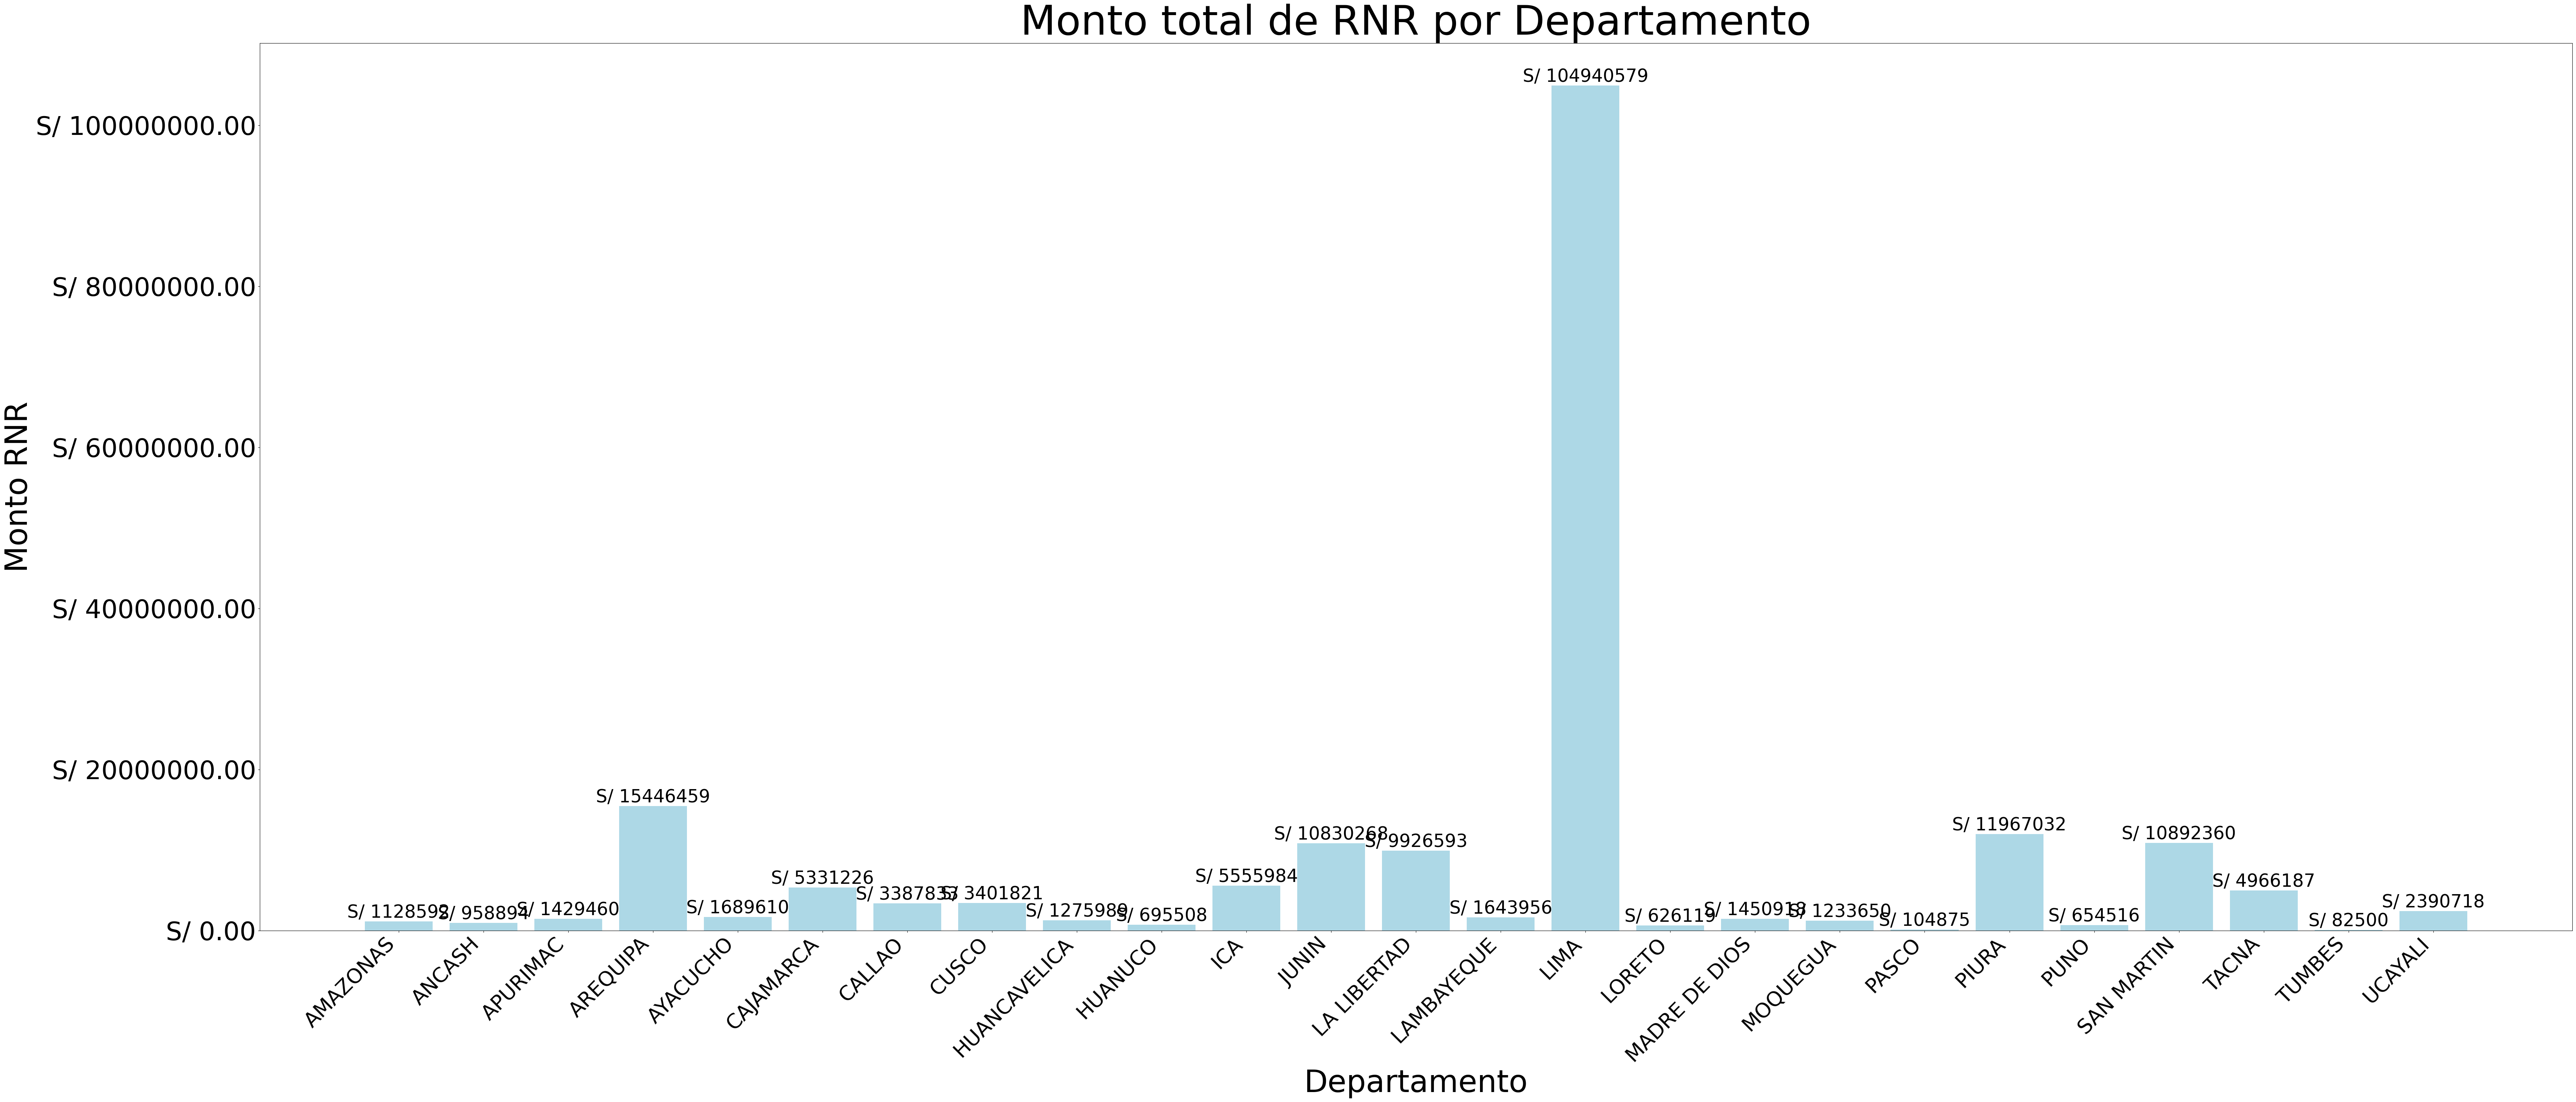

In [6]:
# Convertir montos en dólares a soles
tasa_cambio_actual = 3.77
df['MONTO_RNR_EN_SOLES'] = df['MONTO_RNR']
df.loc[df['MONEDA'] == 'DOLARES', 'MONTO_RNR_EN_SOLES'] *= tasa_cambio_actual

# Calcular el monto RNR por departamento
monto_rnr_por_departamento = df.groupby('DEPARTAMENTO')['MONTO_RNR_EN_SOLES'].sum().reset_index()
monto_rnr_por_departamento.columns = ['Departamento', 'Monto total de RNR']

# Crear el gráfico 
plt.figure(figsize=(70, 30))

# Crear las barras para el monto total de RNR
bars = plt.bar(monto_rnr_por_departamento['Departamento'], monto_rnr_por_departamento['Monto total de RNR'], color='lightblue')

# Añadir los valores encima de las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'S/ {yval:.0f}', ha='center', va='bottom', fontsize='35')

plt.xlabel('Departamento', fontsize = 60)
plt.ylabel('Monto RNR', fontsize = 60)
plt.title('Monto total de RNR por Departamento', fontsize=80)
plt.xticks(rotation=45, ha='right')
plt.tick_params(axis='y', labelsize=50)
plt.tick_params(axis='x', labelsize=40)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('S/ %.2f'))
plt.tight_layout()
plt.show()


Promedio de montos RNR por departamento:


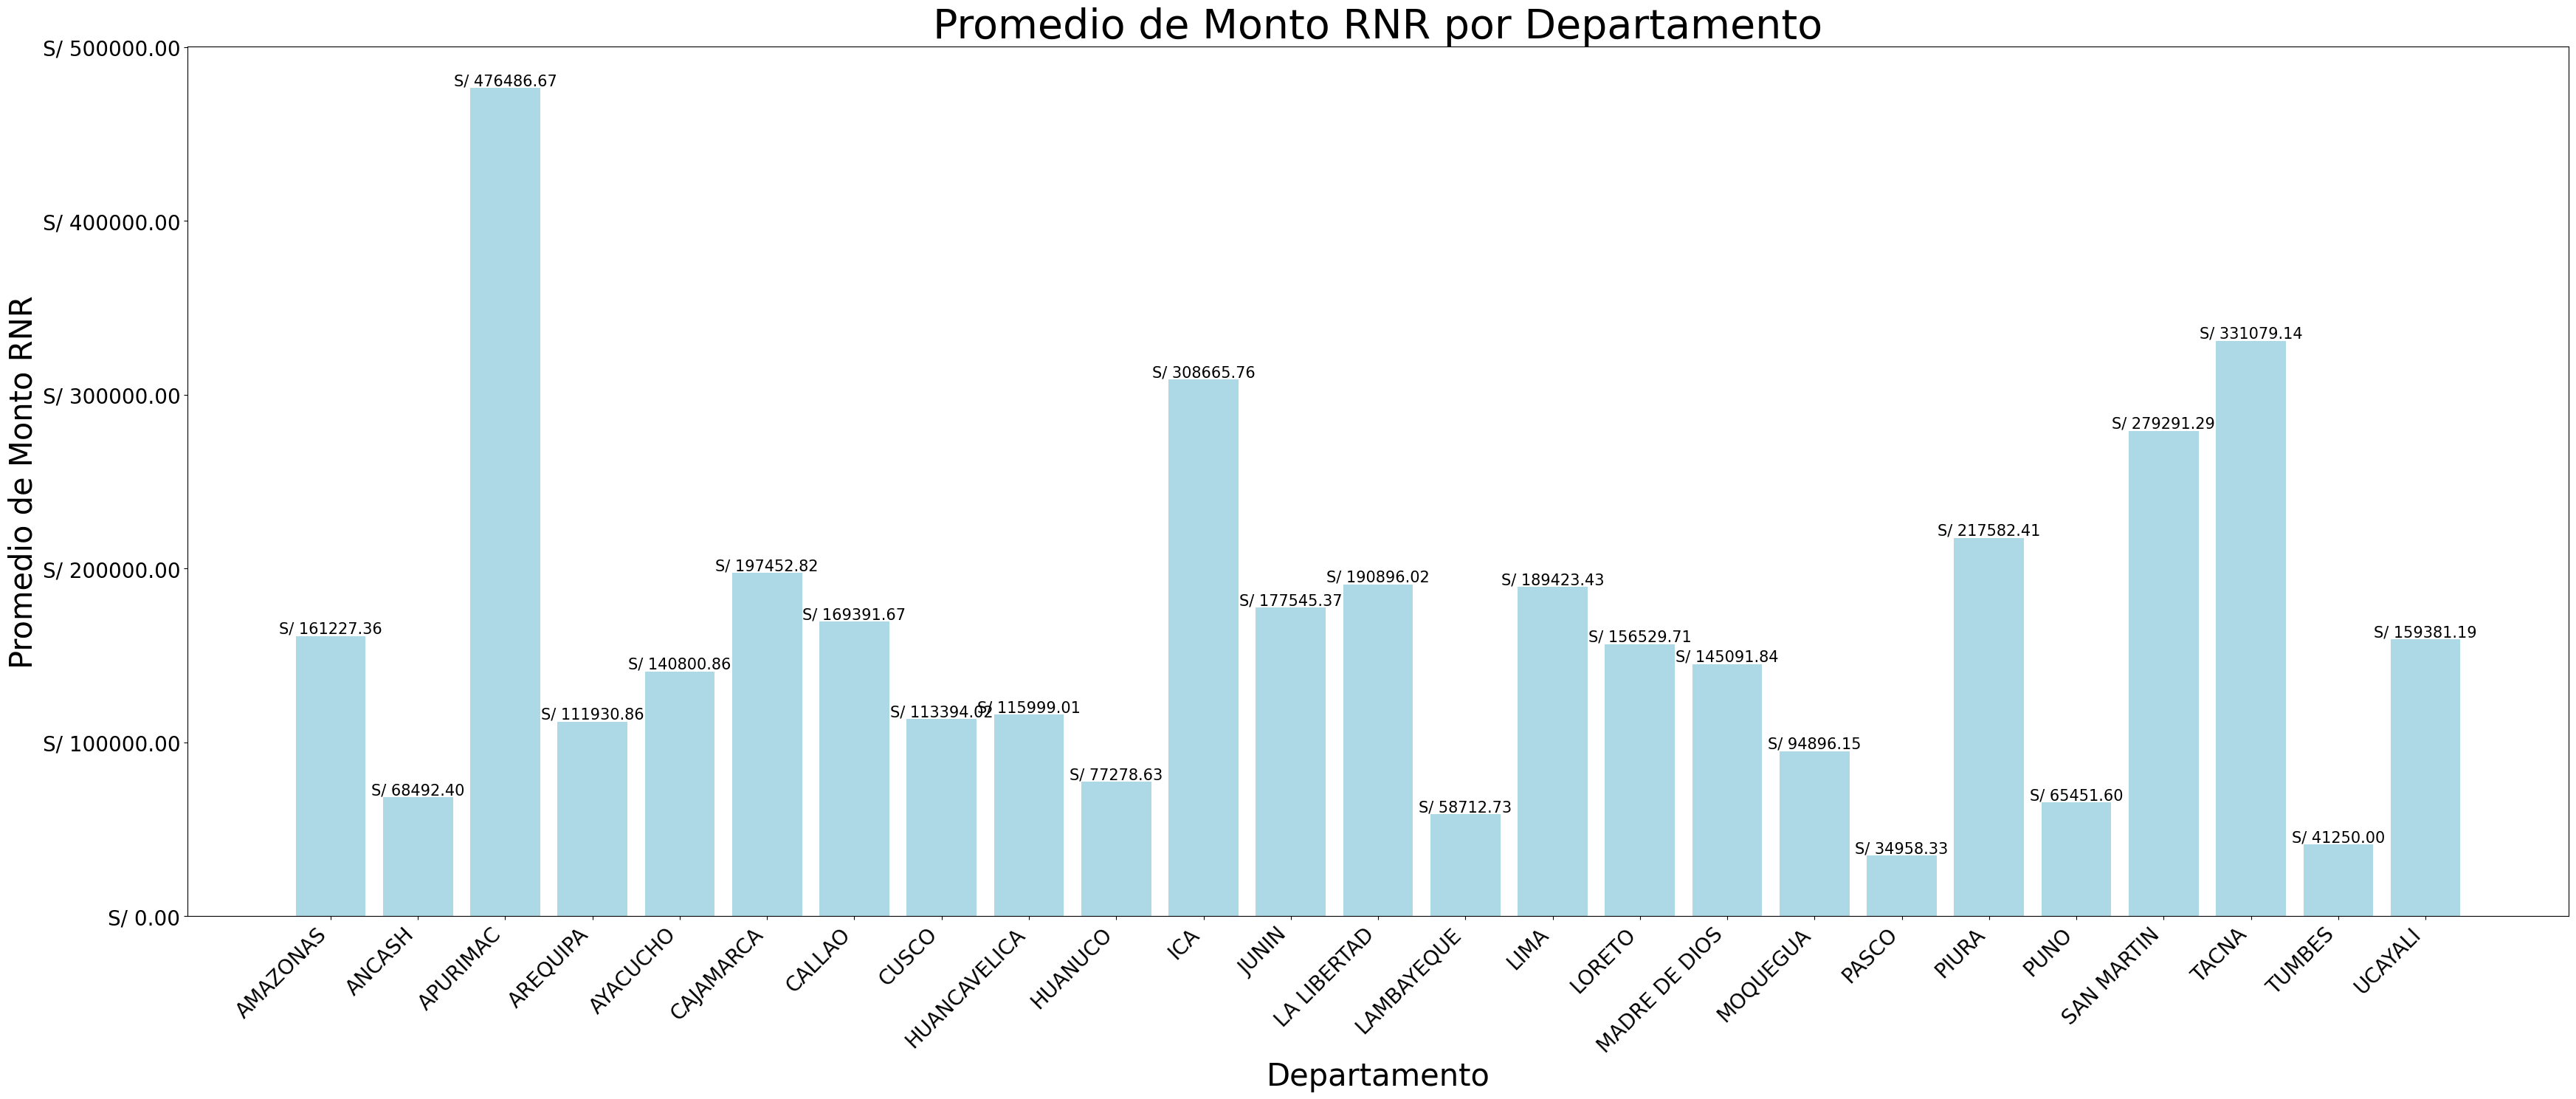

In [7]:
# Convertir montos en dólares a soles
tasa_cambio_actual = 3.77
df['MONTO_RNR_EN_SOLES'] = df['MONTO_RNR']
df.loc[df['MONEDA'] == 'DOLARES', 'MONTO_RNR_EN_SOLES'] *= tasa_cambio_actual

# Calcular el promedio del monto RNR por departamento
promedio_monto_rnr_por_departamento = df.groupby('DEPARTAMENTO')['MONTO_RNR_EN_SOLES'].mean().reset_index()
promedio_monto_rnr_por_departamento.columns = ['Departamento', 'Promedio de Monto RNR']

# Crear el gráfico
plt.figure(figsize=(35, 15))

# Crear las barras para el promedio del monto RNR
bars = plt.bar(promedio_monto_rnr_por_departamento['Departamento'], promedio_monto_rnr_por_departamento['Promedio de Monto RNR'], color='lightblue')

# Añadir los valores encima de las barras 
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'S/ {yval:.2f}', ha='center', va='bottom', fontsize='15')

plt.xlabel('Departamento', fontsize = 30)
plt.ylabel('Promedio de Monto RNR', fontsize = 30)
plt.title('Promedio de Monto RNR por Departamento', fontsize=40)
plt.xticks(rotation=45, ha='right')
plt.tick_params(axis='y', labelsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('S/ %.2f'))
plt.tight_layout()
plt.show()

Número de proyectos por nombre de fondo.

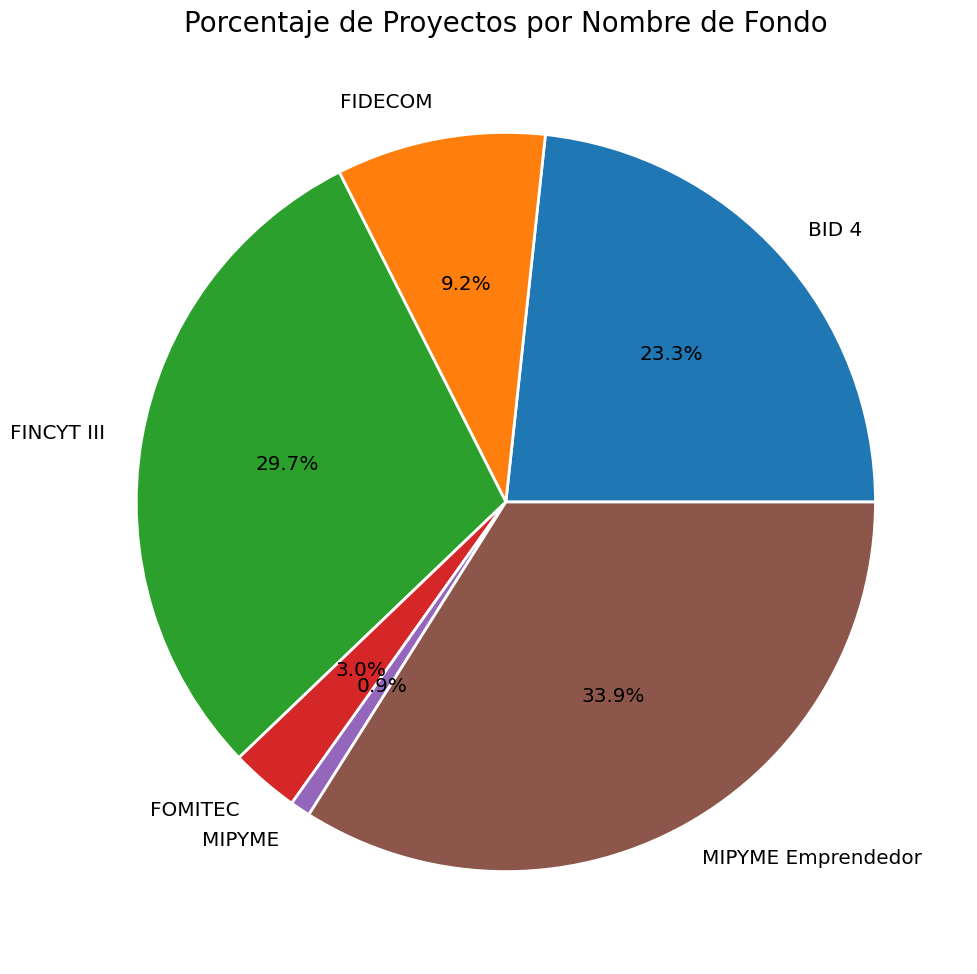

In [8]:
# Calcular el número de proyectos por nombre de fondo
proyectos_por_fondo = df.groupby('FONDO')['CONTRATO'].count().reset_index()
proyectos_por_fondo.columns = ['Fondo', 'Número de Proyectos']

# Crear el gráfico de pastel
plt.figure(figsize=(12, 12))

plt.pie(proyectos_por_fondo['Número de Proyectos'], labels=proyectos_por_fondo['Fondo'], autopct='%1.1f%%',
                                                    wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'},
                                                    textprops={'size': 'x-large'})

plt.title('Porcentaje de Proyectos por Nombre de Fondo', fontsize=20)

plt.show()


Monto total de RNR por nombre de fondo

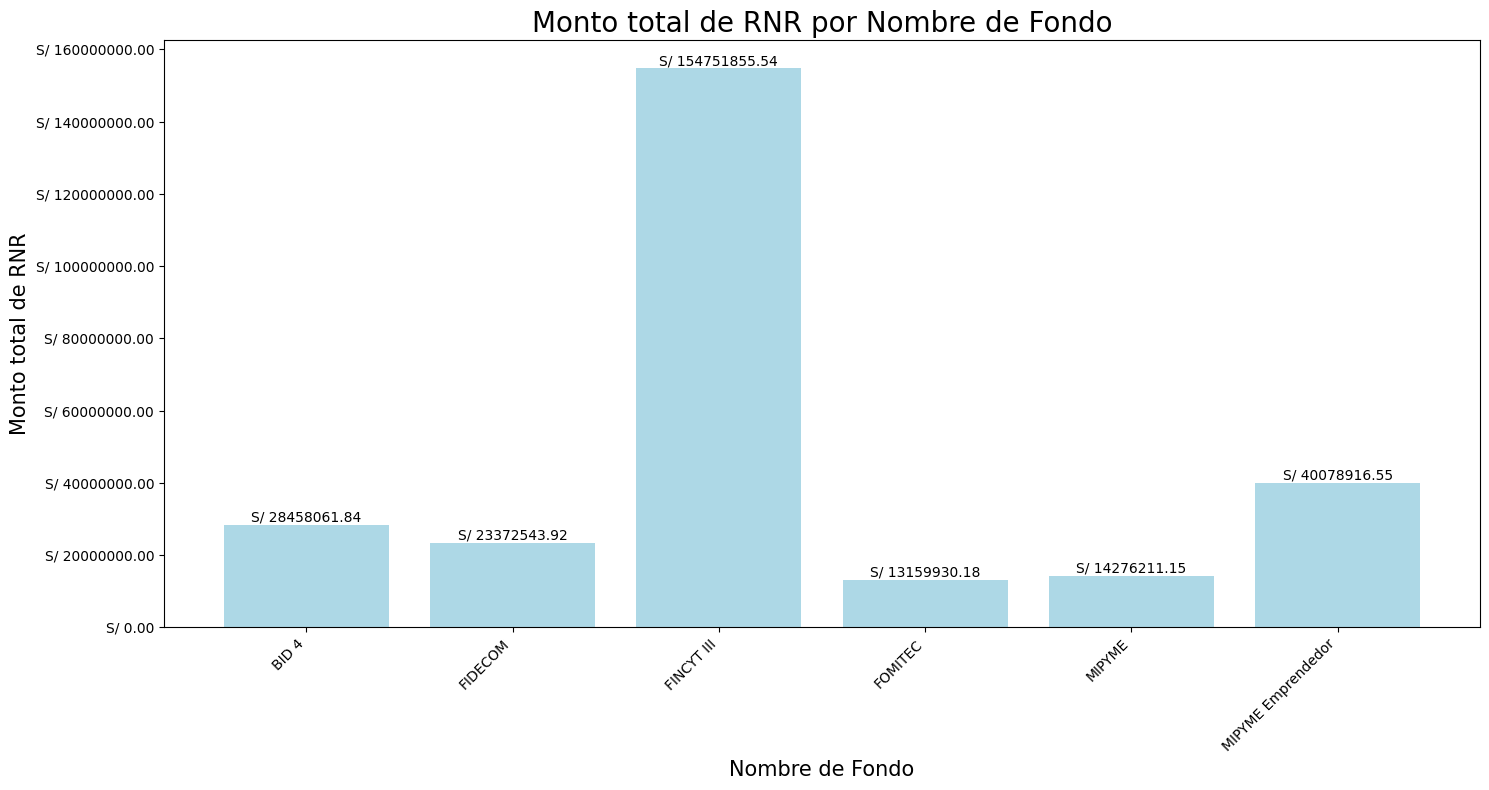

In [9]:
# Convertir montos en dólares a soles
tasa_cambio_actual = 3.77
df['MONTO_RNR_EN_SOLES'] = df['MONTO_RNR']
df.loc[df['MONEDA'] == 'DOLARES', 'MONTO_RNR_EN_SOLES'] *= tasa_cambio_actual

# Calcular el Monto total de RNR por nombre de fondo
monto_rnr_por_fondo = df.groupby('FONDO')['MONTO_RNR_EN_SOLES'].sum().reset_index()
monto_rnr_por_fondo.columns = ['Fondo', 'Monto total de RNR']

# Crear el gráfico
plt.figure(figsize=(15, 8))

# Crear las barras para el Monto total de RNR por fondo
bars = plt.bar(monto_rnr_por_fondo['Fondo'], monto_rnr_por_fondo['Monto total de RNR'], color='lightblue')

# Añadir los valores encima de las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'S/ {yval:.2f}', ha='center', va='bottom', fontsize='10')

plt.xlabel('Nombre de Fondo', fontsize=15)
plt.ylabel('Monto total de RNR', fontsize=15)
plt.title('Monto total de RNR por Nombre de Fondo', fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('S/ %.2f'))
plt.tight_layout()
plt.show()

Promedio de montos RNR por nombre de fondo

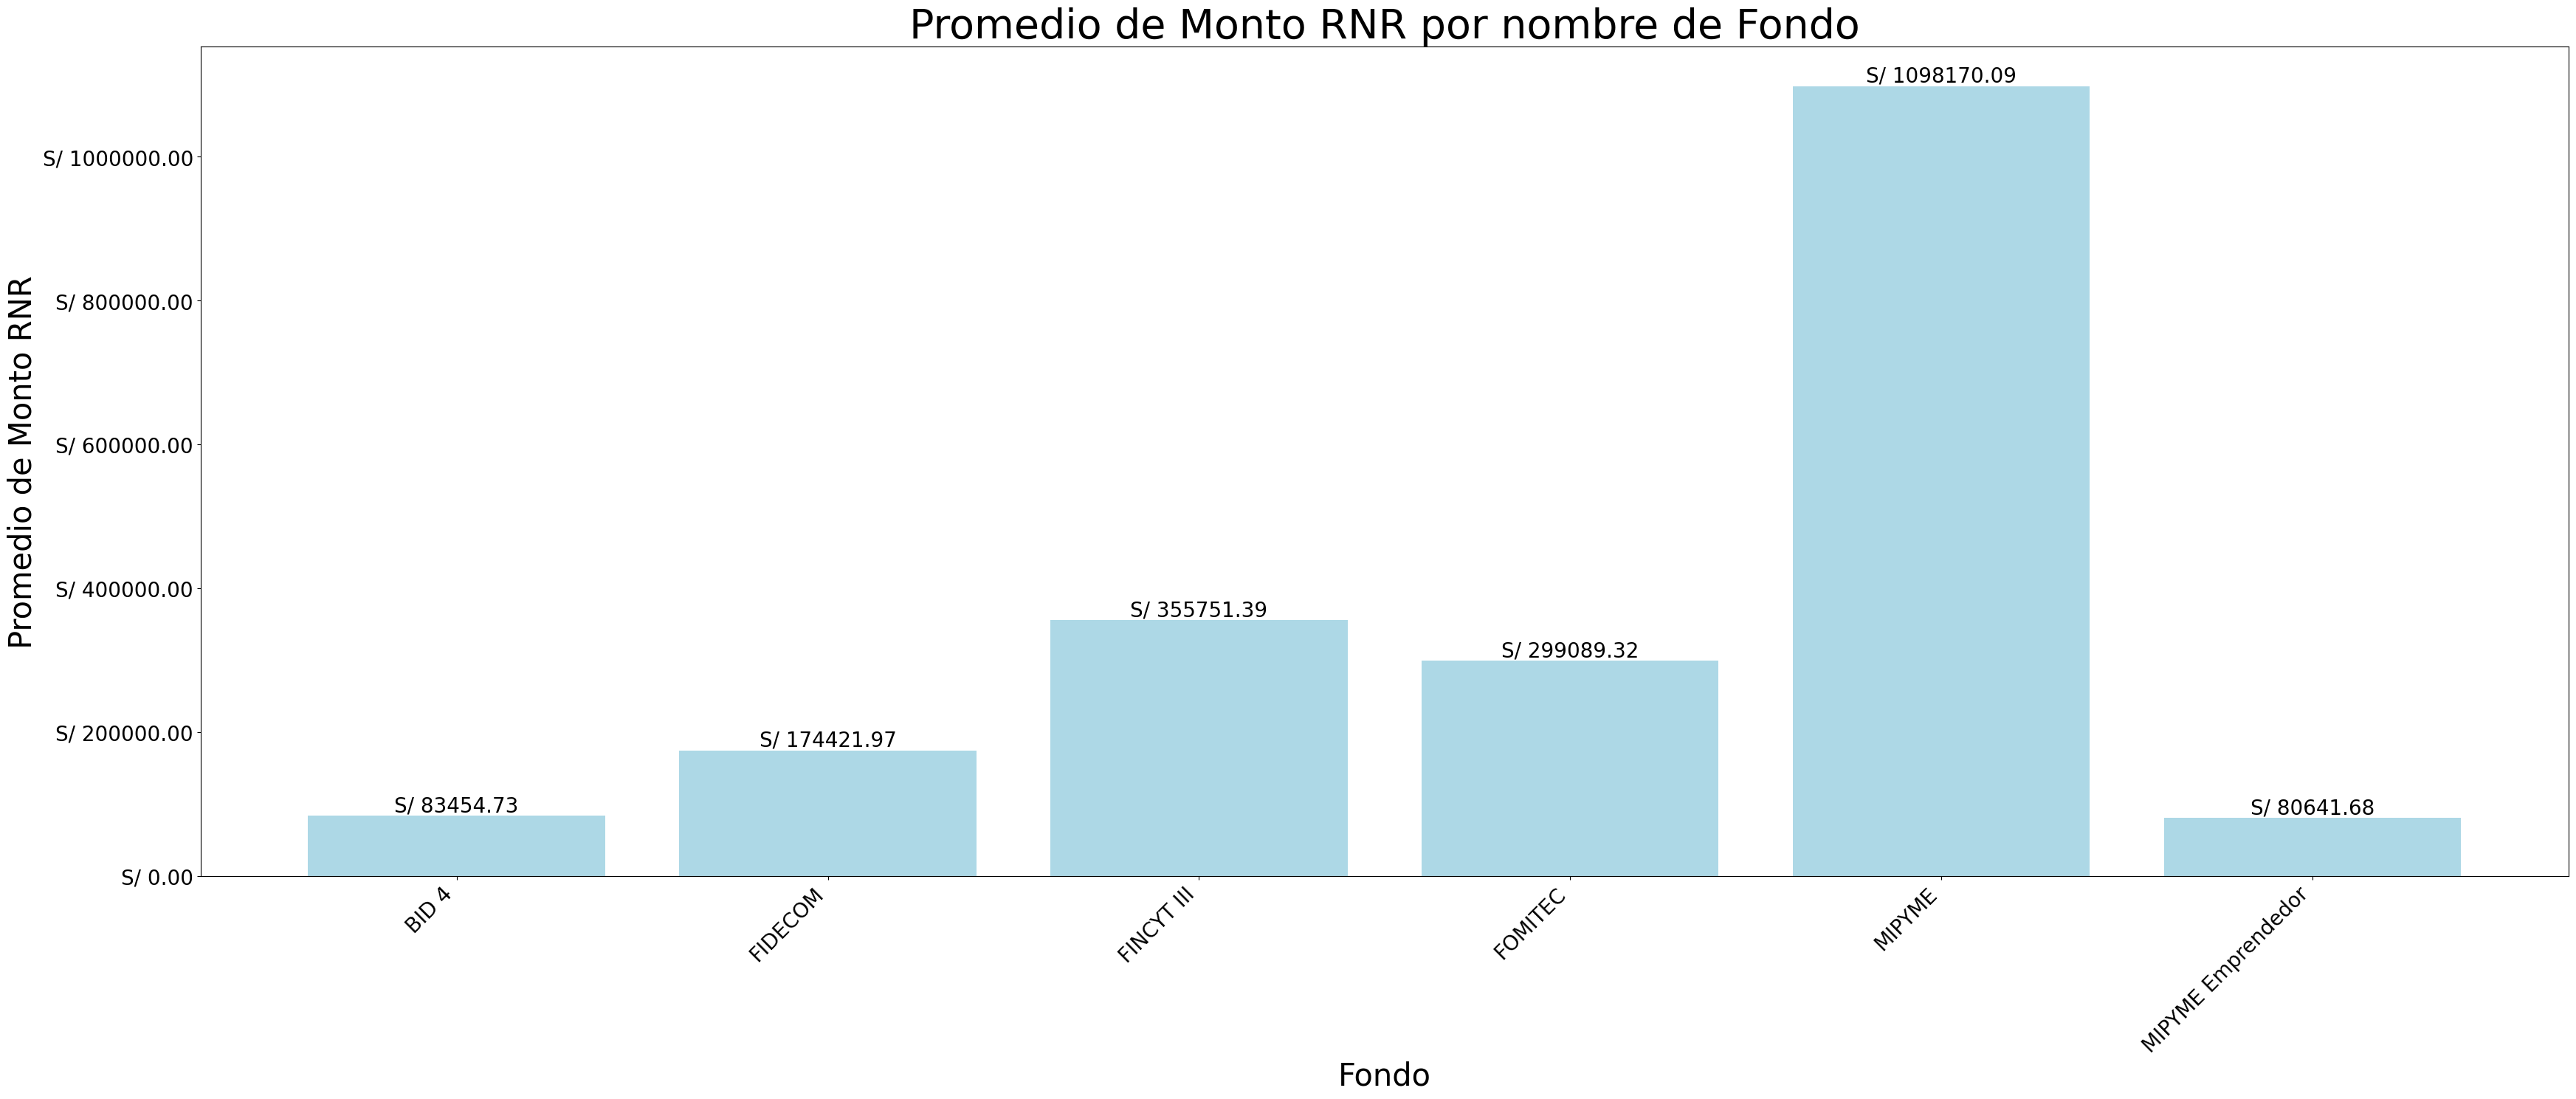

In [10]:
# Convertir montos en dólares a soles
tasa_cambio_actual = 3.77
df['MONTO_RNR_EN_SOLES'] = df['MONTO_RNR']
df.loc[df['MONEDA'] == 'DOLARES', 'MONTO_RNR_EN_SOLES'] *= tasa_cambio_actual

# Calcular el promedio del monto RNR por departamento
promedio_monto_rnr_por_fondo = df.groupby('FONDO')['MONTO_RNR_EN_SOLES'].mean().reset_index()
promedio_monto_rnr_por_fondo.columns = ['Fondo', 'Promedio de Monto RNR']

# Crear el gráfico
plt.figure(figsize=(35, 15))

# Crear las barras para el promedio del monto RNR
bars = plt.bar(promedio_monto_rnr_por_fondo['Fondo'], promedio_monto_rnr_por_fondo['Promedio de Monto RNR'], color='lightblue')

# Añadir los valores encima de las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'S/ {yval:.2f}', ha='center', va='bottom', fontsize='20')

plt.xlabel('Fondo', fontsize = 30)
plt.ylabel('Promedio de Monto RNR', fontsize = 30)
plt.title('Promedio de Monto RNR por nombre de Fondo', fontsize=40)
plt.xticks(rotation=45, ha='right')
plt.tick_params(axis='y', labelsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('S/ %.2f'))
plt.tight_layout()
plt.show()

Número de proyectos por Anio

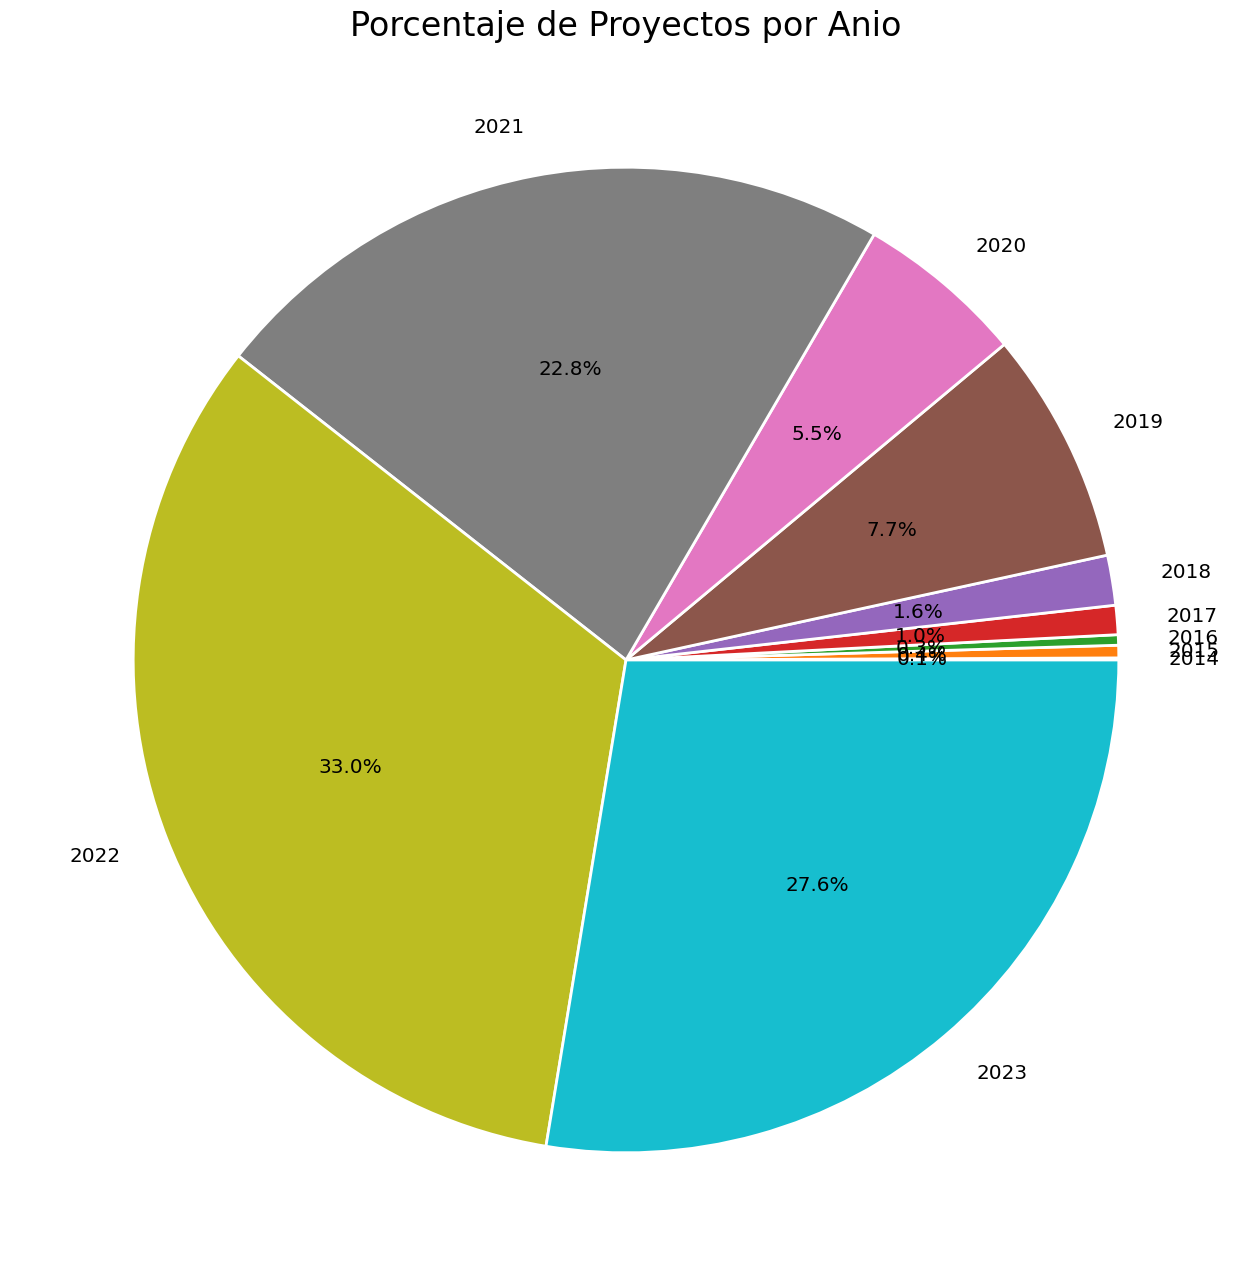

In [11]:
# Calcular el número de proyectos por anio
proyectos_por_anio = df.groupby('ANIO')['CONTRATO'].count().reset_index()
proyectos_por_anio.columns = ['Anio', 'Numero de Proyectos']

# Crear el gráfico de pastel
plt.figure(figsize=(16, 16))

plt.pie(proyectos_por_anio['Numero de Proyectos'],  labels=proyectos_por_anio['Anio'], autopct='%.1f%%',
                                                    wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'},
                                                    textprops={'size': 'x-large'})

plt.title('Porcentaje de Proyectos por Anio', fontsize=24)

plt.show()

Monto total de RNR por Anio

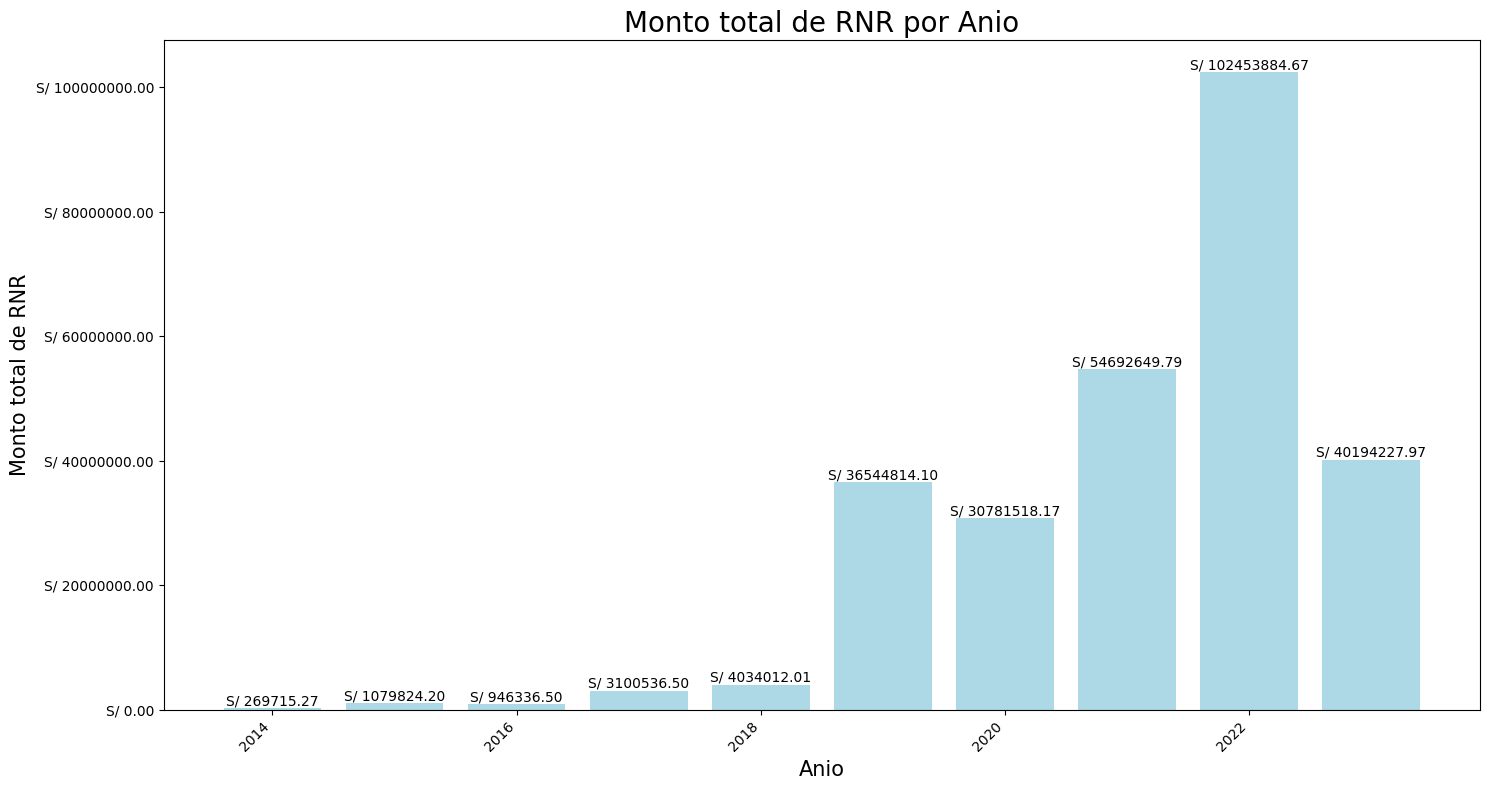

In [12]:
# Convertir montos en dólares a soles
tasa_cambio_actual = 3.77
df['MONTO_RNR_EN_SOLES'] = df['MONTO_RNR']
df.loc[df['MONEDA'] == 'DOLARES', 'MONTO_RNR_EN_SOLES'] *= tasa_cambio_actual

# Calcular el Monto total de RNR por anio
monto_rnr_por_anio = df.groupby('ANIO')['MONTO_RNR_EN_SOLES'].sum().reset_index()
monto_rnr_por_anio.columns = ['Anio', 'Monto total de RNR']

# Crear el gráfico
plt.figure(figsize=(15, 8))

# Crear las barras para el Monto total de RNR por fondo
bars = plt.bar(monto_rnr_por_anio['Anio'], monto_rnr_por_anio['Monto total de RNR'], color='lightblue')

# Añadir los valores encima de las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'S/ {yval:.2f}', ha='center', va='bottom', fontsize='10')

plt.xlabel('Anio', fontsize=15)
plt.ylabel('Monto total de RNR', fontsize=15)
plt.title('Monto total de RNR por Anio', fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('S/ %.2f'))
plt.tight_layout()
plt.show()

Promedio de monto total de RNR por Anio

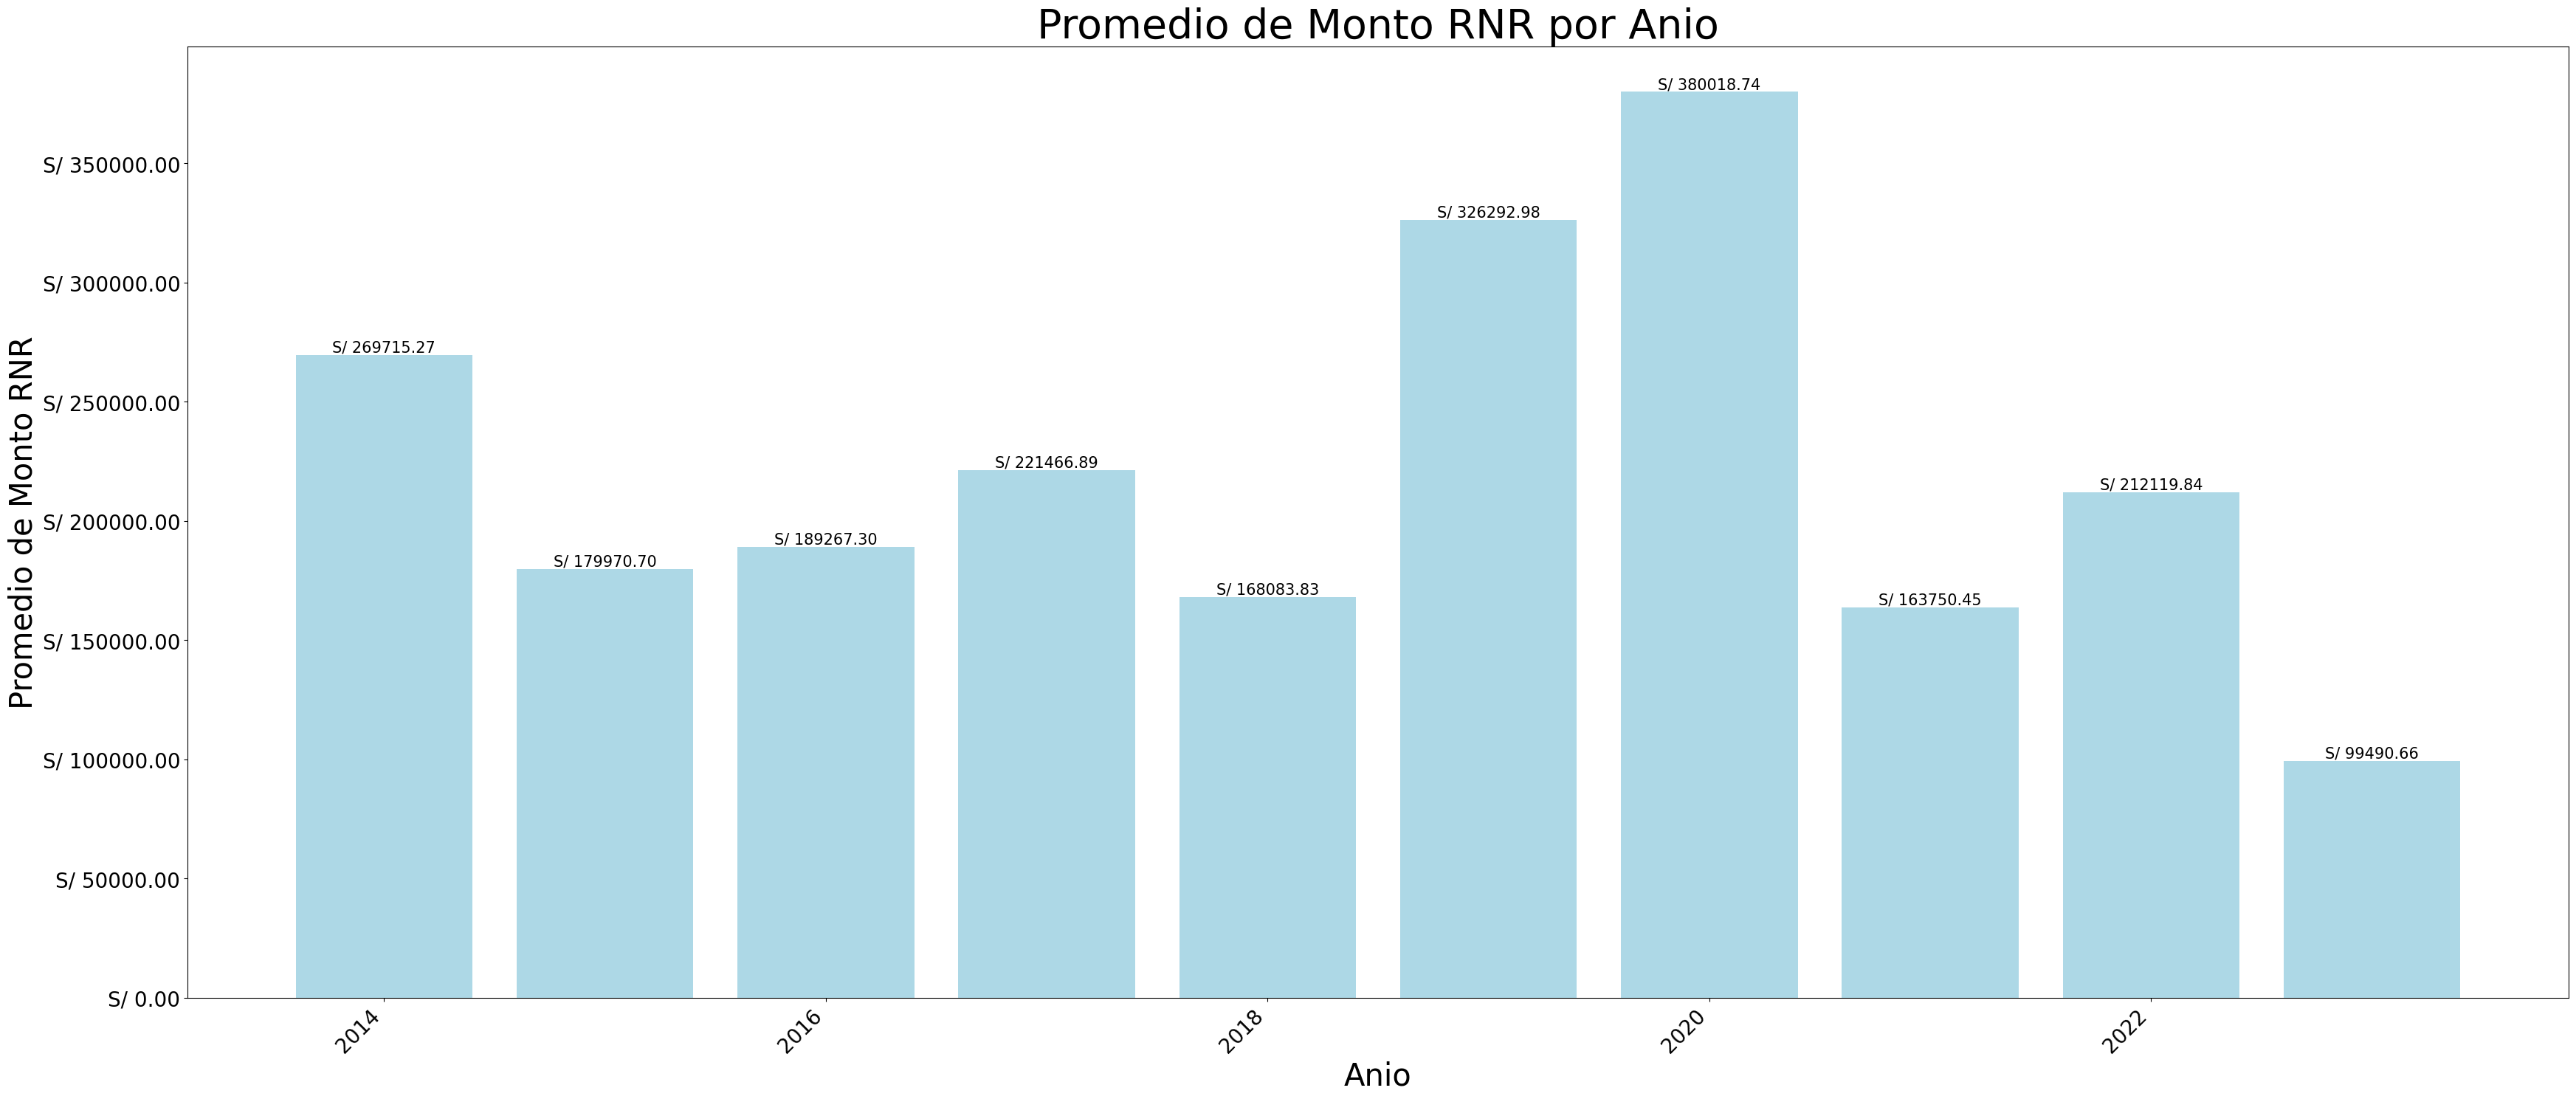

In [13]:
# Convertir montos en dólares a soles
tasa_cambio_actual = 3.77
df['MONTO_RNR_EN_SOLES'] = df['MONTO_RNR']
df.loc[df['MONEDA'] == 'DOLARES', 'MONTO_RNR_EN_SOLES'] *= tasa_cambio_actual

# Calcular el promedio del monto RNR por año
promedio_monto_rnr_por_anio = df.groupby('ANIO')['MONTO_RNR_EN_SOLES'].mean().reset_index()
promedio_monto_rnr_por_anio.columns = ['Anio', 'Promedio de Monto RNR']

# Crear el gráfico
plt.figure(figsize=(35, 15))

# Crear las barras para el promedio del monto RNR
bars = plt.bar(promedio_monto_rnr_por_anio['Anio'], promedio_monto_rnr_por_anio['Promedio de Monto RNR'], color='lightblue')

# Añadir los valores encima de las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'S/ {yval:.2f}', ha='center', va='bottom', fontsize='15')

plt.xlabel('Anio', fontsize=30)
plt.ylabel('Promedio de Monto RNR', fontsize=30)
plt.title('Promedio de Monto RNR por Anio', fontsize=40)
plt.xticks(rotation=45, ha='right')
plt.tick_params(axis='y', labelsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('S/ %.2f'))
plt.tight_layout()
plt.show()
